In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Step 1: Data Loading

In [ ]:
# read data into a DataFrame
data = pd.read_csv(r'Advertising.csv',index_col=0)
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [ ]:
print(data.dtypes)

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object


In [ ]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<Axes: >

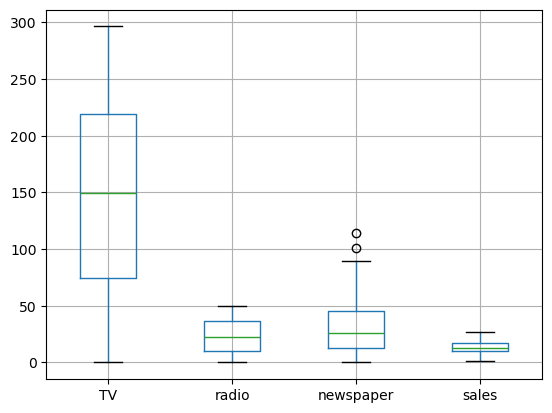

In [ ]:
data.boxplot()

In [ ]:
data.columns

### Pre Assumptions

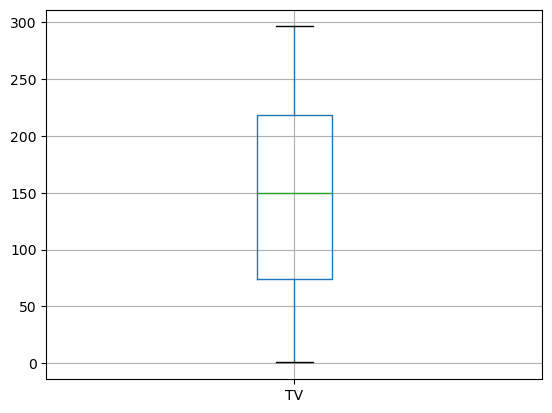

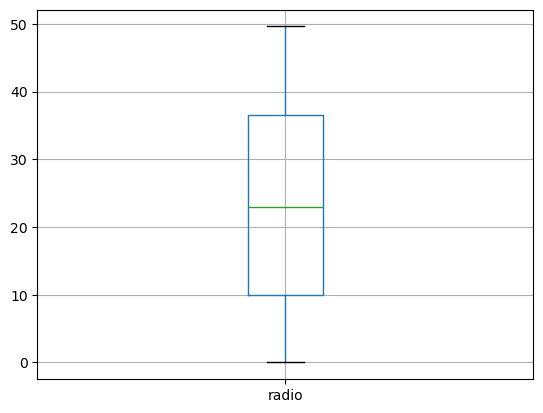

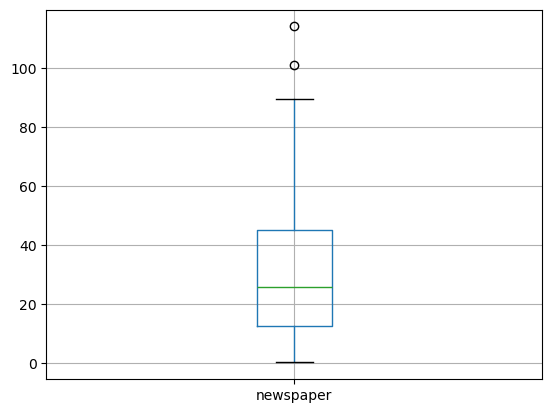

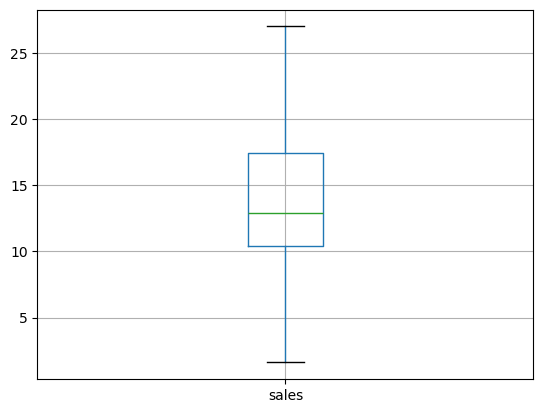

In [ ]:
#Assumption 1: There should be no outliers in the data.
#Check using boxplot.
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

In [ ]:
# filtered the outliers
df = data[data["newspaper"]<90]
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [ ]:
data[data["newspaper"]>90].index

Index([17, 102], dtype='int64')

In [ ]:
data.drop(data[data["newspaper"]>90].index,axis=0)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


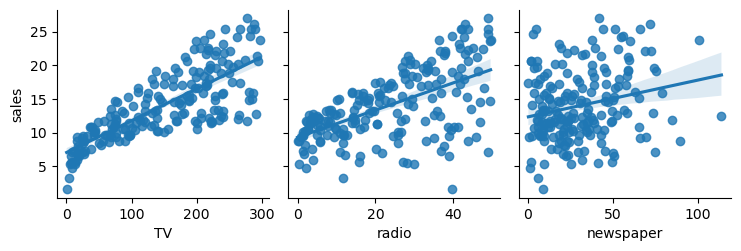

In [ ]:
#Assumption 2:Assumption of Linearity:Every independent variable should have a
#linear relationship with the dependent variable.

sns.pairplot(data,x_vars=['TV', 'radio', 'newspaper'],
             y_vars=["sales"], kind='reg')
plt.show();

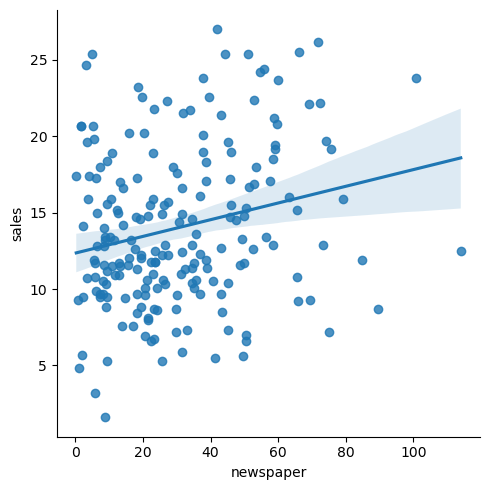

In [ ]:
sns.lmplot(data=data,x="newspaper",y="sales")
plt.show();

In [ ]:
#data.drop(["newspaper"],axis=1,inplace=True)

In [ ]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
# create X and Y
X = data.loc[:,['TV', 'radio', 'newspaper']]
Y = data.loc[:,'sales']
#X=data.iloc[:,0:-1]
#Y=data.iloc[:,-1]

In [ ]:
Y.shape

(200,)

In [ ]:
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


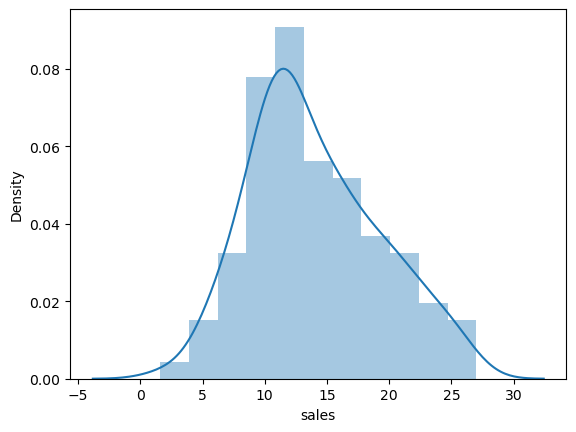

In [ ]:
#Assumption of Normality: The dependent variable should follow an
#approximate normal distribution
sns.distplot(Y)
plt.show()

In [ ]:
from scipy.stats import skew
skew(Y)

np.float64(0.4045082487061191)

In [ ]:
"""
# Log transformation
import numpy as np
Y_log  = np.log(Y)
Y_log
"""

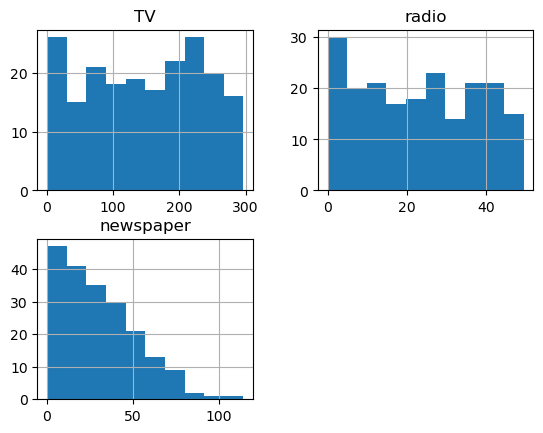

In [ ]:
X.hist(bins=10)
plt.show()

In [ ]:
for i in X.columns:
    print(f"{i} : {skew(X[i])}")

TV : -0.06932836662244649
radio : 0.0934668451108453
newspaper : 0.8879959753085498


In [ ]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print(data_num_skewed)

#import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
new = np.log1p(X["newspaper"])

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


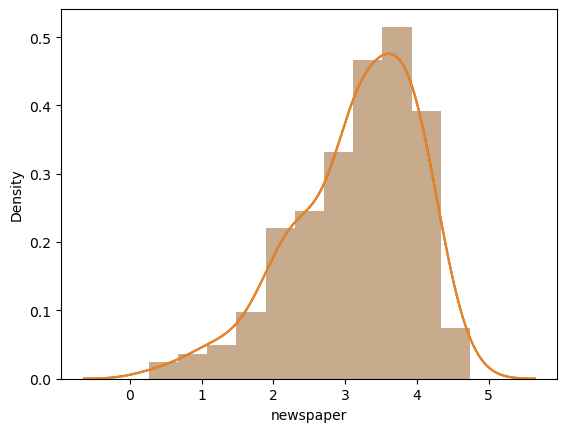

In [ ]:
sns.distplot(new)
plt.show();

                 TV     radio  newspaper
TV         1.000000  0.054809   0.056648
radio      0.054809  1.000000   0.354104
newspaper  0.056648  0.354104   1.000000


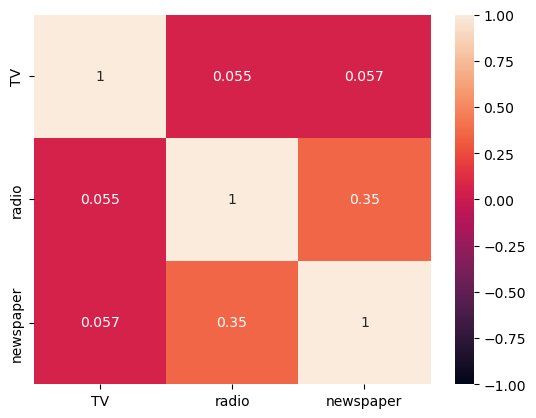

In [ ]:
#Assumption of no multicollinearity: There should be no multicollinearity
#between the independent variables
#multicollinearity is the relationship amongst the multiple independent variables
corr_df=X.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

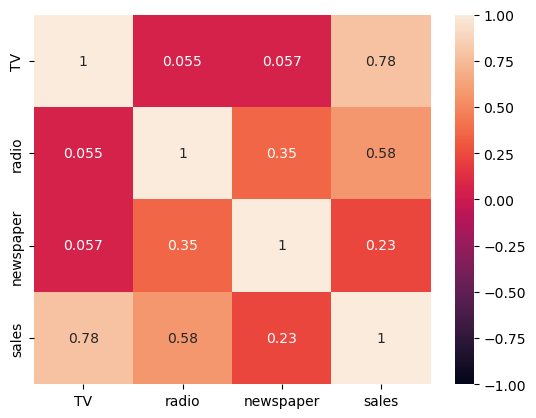

In [ ]:
sns.heatmap(data.corr(method="pearson"),vmax=1.0,vmin=-1.0,annot=True)
plt.show()

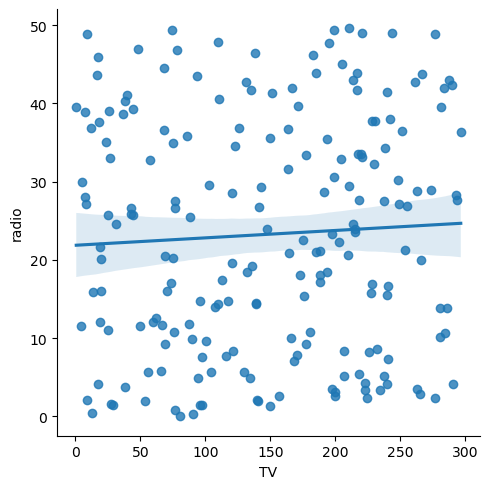

In [ ]:
sns.lmplot(data,x="TV",y="radio")
plt.show()

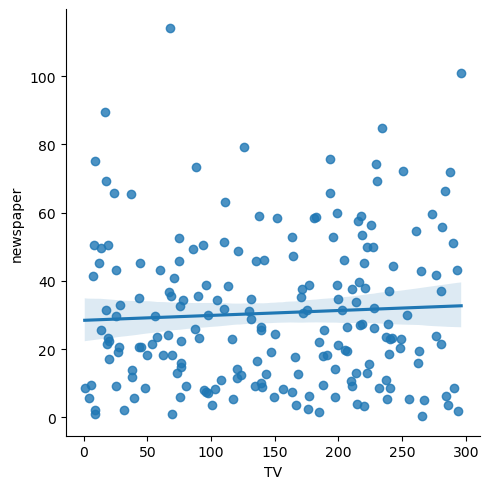

In [ ]:
sns.lmplot(data,x="TV",y="newspaper")
plt.show()

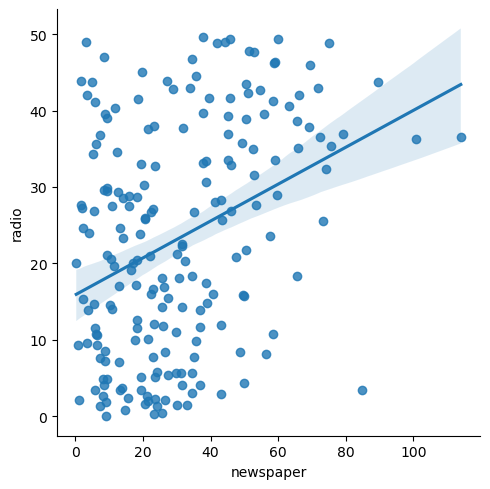

In [ ]:
sns.lmplot(data,x="newspaper",y="radio")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df

In [ ]:
#>1000-->test_size=0.3
# >1000 ---> data split(70% - 30%) - 70%(training) & 30%(testing)

#<1000-->test_size=0.2
#<1000 --> data split(80% - 20%) - 80%(training) & 20%(testing)

In [ ]:
from sklearn.model_selection import train_test_split
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,
                                                    random_state=10)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print("Percent of train data",X_train.shape[0]/X.shape[0]*100)

In [ ]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

In [ ]:
# pair the feature names with the coefficients
print(list(zip(X.columns, lm.coef_)))

In [ ]:
X1=0 #TV
X2=0 #radio
X3=0  #newspaper
Y_pred=3.2540971144188813+(0.0437726*X1)+(0.19343299*X2)+(-0.00222879*X3)
print(Y_pred)

In [ ]:
X_test.shape

In [ ]:
#predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

In [ ]:
new_df=pd.DataFrame()
new_df=X_test.copy()

new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
new_df=new_df.reset_index().drop("index", axis=1)

In [ ]:
new_df

In [ ]:
new_df["Actual sales"].plot(color="blue")
new_df["Predicted sales"].plot(color="orange")
plt.show()

In [ ]:
print(lm.score(X_train, Y_train))

In [ ]:
print(len(Y_test))
print(len(Y_pred))

In [ ]:
import sklearn
sklearn.metrics.mean_squared_error(Y_test,Y_pred)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

mse = mean_squared_error(Y_test,Y_pred)
print("MSE:",mse)

mae = mean_absolute_error(Y_test,Y_pred)
print("MAE:",mae)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

In [ ]:
print(Y_test.min())
print(Y_test.max())

In [ ]:
new_df

In [ ]:
import os
os.getcwd()

In [ ]:
new_df["Residual"]=new_df["Actual sales"]-new_df["Predicted sales"]
new_df.to_excel("Sales Prediction.xlsx",header=True,index=True)
new_df

### Testing Phase --> Unseen data

In [ ]:
invest = pd.DataFrame({"TV":[100,25,200,30,2],
                       "radio":[200,100,50,120,30],
                       "newspaper":[0,1,1.5,2,0]})
invest

In [ ]:
Y_pred_inv = lm.predict(invest)
Y_pred_inv

In [ ]:
invest["Sales Pred"] = Y_pred_inv
invest

#### Model Tunning / Optimization

In [ ]:
from sklearn.model_selection import train_test_split
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=10)

In [ ]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(X_train,Y_train)
"""
3.2540971144188813
[ 0.0437726   0.19343299 -0.00222879]
"""
# print intercept and coefficients
print (rid.intercept_)
print (rid.coef_)

In [ ]:
Y_pred=rid.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np
"""R-squared: 0.8353672324670594
MSE: 6.700486756528875
MAE: 1.885013031042315
RMSE: 2.58852984462781
Adj R-square: 0.8328473431680857
"""

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

mse = mean_squared_error(Y_test,Y_pred)
print("MSE:",mse)

mae = mean_absolute_error(Y_test,Y_pred)
print("MAE:",mae)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

In [ ]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(X_train,Y_train)
"""
3.2540971144188813
[ 0.0437726   0.19343299 -0.00222879]
"""
# print intercept and coefficients
print (las.intercept_)
print (las.coef_)

In [ ]:
Y_pred = las.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np
"""R-squared: 0.8353672324670594
MSE: 6.700486756528875
MAE: 1.885013031042315
RMSE: 2.58852984462781
Adj R-square: 0.8328473431680857
"""

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

mse = mean_squared_error(Y_test,Y_pred)
print("MSE:",mse)

mae = mean_absolute_error(Y_test,Y_pred)
print("MAE:",mae)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

In [ ]:
#OLS-->OLS(Y_train, X_train) # sklearn
#ols-->ols(Y~X1+X2+X3)  # statsmodels

In [ ]:
#fit(X_train, Y_train)-->sklearn
#Y~X1+X2+X3,data=df-->statsmodels

In [ ]:
new_df=pd.DataFrame()
new_df=X_train.copy()

new_df["sales"]=Y_train.copy()
new_df

In [ ]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio + newspaper',
                  data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())



In [ ]:
Y_pred_new=lm_model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

In [ ]:
import statsmodels.formula.api as sm

# create a fitted model with two features
lm_model = sm.ols(formula='sales ~ TV + radio', data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())

In [ ]:
Y_pred_new=lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

In [ ]:
#Assumption: Errors should be random
#checked using Residual v/s Fitted plot
model_fitted_y = lm_model.fittedvalues
sns.residplot(x=model_fitted_y, y='sales', data=new_df, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
#Assumption: Errors should follow a approximate normal distribution
#checked using Normal QQ plot
import statsmodels.api as sma
sma.qqplot(lm_model.resid, line='s')
plt.show()

In [ ]:
#Assumption: Errors should follow a constant variance-->Homoskedasticity
#checked using Scale location plot
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(lm_model.resid))

sns.regplot(x=lm_model.fittedvalues,
            y=model_norm_residuals_abs_sqrt,
              scatter=True, lowess=True)
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()